Уменьшите размерность при помощи библиотеки sklearn. Обратите внимание на параметр svd_solver, он отвечает за способ построения матричного разложения. Чтобы получать одинаковые результаты (в частности, согласованные с лекцией), используйте следующий параметр метода PCA:

svd_solver='full'.

# Задание 1.

В предложенном файле находится набор синтетических данных. Данные описывают 60 объектов, каждый из которых обладает 10 признаками. Ваша задача, используя метод главных компонент, перейти к новым координатам и найти следующие параметры.

In [19]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('41_25.csv', sep=',', header=None)
df

,0,1,2,3,4,5,6,7,8,9
0,-7.740340,9.277438,-4.854174,-1.202028,-12.348254,-10.066532,14.795244,19.147509,-16.013266,-9.549785
1,-11.313491,-21.953282,8.975190,-23.328462,-15.637988,6.108675,-13.792329,9.819516,19.525042,-3.615621
2,5.473343,12.630822,-5.005415,-4.796412,-15.365238,-3.247915,-6.766479,4.724994,-20.113874,10.556540
3,3.979157,12.917397,-3.554173,-5.197877,-13.169246,-2.132375,-7.997947,5.541322,-18.522509,11.654845
4,-13.582469,-20.957017,9.967119,-24.720595,-20.364866,4.937101,-17.882545,9.390128,19.921203,-4.903220
5,-3.940524,-9.461043,-14.226194,-10.237634,-0.496039,-20.696005,8.071990,-8.286482,11.890073,-5.164534
6,-12.399072,-23.136882,8.434505,-23.019813,-20.706147,2.316331,-16.027884,10.880319,18.617031,-4.078109
7,-8.696311,-12.563854,-19.199404,-8.371936,-1.673956,-21.707734,10.253582,-11.509820,13.607466,-3.465147
8,-10.617878,-10.675307,-17.863756,-7.762130,-0.645575,-21.751581,8.948673,-9.728999,13.411704,-8.026638
9,-7.059931,-12.592969,-15.905056,-10.782926,-2.804029,-22.042572,9.466859,-9.015643,11.135511,-5.925311


In [9]:
pca = PCA(n_components=2)
z = pca.fit_transform(df)

Введите координату первого объекта относительно первой главной компоненты.

In [12]:
round(z[0][0], 3)

22.908

Введите координату первого объекта относительно второй главной компоненты.

In [13]:
round(z[0][1], 3)

-14.301

Введите долю объясненной дисперсии при использовании первых двух главных компонент.

In [16]:
round(pca.explained_variance_ratio_.sum(), 3)

0.79

Какое минимальное количество главных компонент необходимо использовать, чтобы доля объясненной дисперсии превышала 0.85

In [17]:
i = 1
check_val = 0.85
while True:
  pca = PCA(n_components=i)
  pca.fit(df)
  exp_var_ratio = pca.explained_variance_ratio_.sum()
  if exp_var_ratio > check_val:
    print(i)
    break
  i += 1

3


Какое количество групп объектов можно выделить, если использовать только первые две главных компоненты?

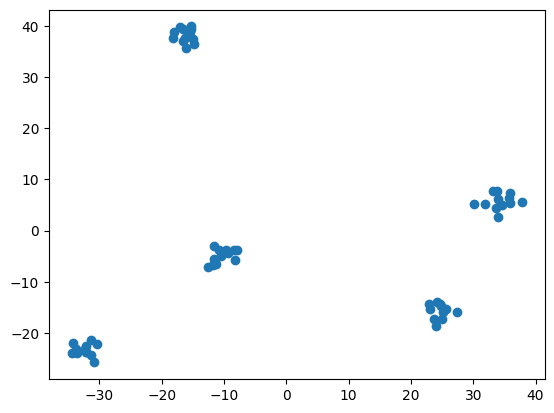

In [20]:
pca = PCA(n_components=2)
z = pca.fit_transform(df)
z = z.T
plt.scatter(z[0], z[1])
plt.show()

# Задание 2.

Для прохода на новогодний корпоратив в ИТМО при входе нужно отгадать «логотип мероприятия». Для получения изображения логотипа необходимо по первым десяти главным компонентам восстановить исходное изображение (в качестве пригласительных рассылались матрица счётов и матрица весов первых десяти ГК).

In [71]:
from numpy import genfromtxt
phi = genfromtxt('X_reduced_456.csv', delimiter=';')
z = genfromtxt('X_loadings_456.csv', delimiter=';')

In [72]:
pca = PCA(n_components=10, svd_solver='full')
pca.components_=phi.T
pca.mean_=0
f = pca.inverse_transform(z)

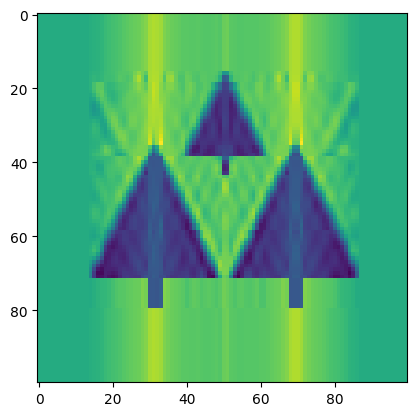

In [76]:
plt.imshow(f.T)